Project: **Exploratory Data Analysis for the CDC Chronic Disease Indicators (CDI): Diabetes Dataset**

This code was written by Zainab Haider

Jupyter Notebook/Python

Date: 08/24/2020

Library

In [15]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy import stats
from scipy.stats import levene

overall = pd.read_csv(r'...\Overall_Diabetes_CDI.csv')
gender = pd.read_csv(r'...\Gender_Diabetes_CDI.csv')
race = pd.read_csv(r'...\Race_Diabetes_CDI.csv'

# Rename the YearStart column to Year for all three categories
overall.rename(columns = {'YearStart':'Year'}, inplace = True)
gender.rename(columns = {'YearStart':'Year'}, inplace = True)
race.rename(columns = {'YearStart':'Year'}, inplace = True)

**Question: How do diabetes-related mortality rates differ for gender and ethnicity?**


First, I will create a library of data subsets to use throughout this analysis

The diabetes belt is a subset of states in the United States, that Barker et al. (2011) defined in “Geographic distribution of diagnosed diabetes in the U.S.: a diabetes belt.” For the remainder of this analysis (and analysis of diabetes and its comorbidities, I will only be looking at data for states that make up the diabetes belt.

In [16]:
mortality_overall = overall.loc[overall.Question == 'Mortality due to diabetes reported as any listed cause of death']
mortality_gender = gender.loc[gender.Question == 'Mortality due to diabetes reported as any listed cause of death']
mortality_race = race.loc[race.Question == 'Mortality due to diabetes reported as any listed cause of death']

st_ovr = mortality_overall.loc[(mortality_overall.DataValueType == 'Age-adjusted Rate') & (mortality_overall.LocationAbbr != 'US')]
st_g = mortality_gender.loc[mortality_gender.DataValueType == 'Age-adjusted Rate']
st_re = mortality_race.loc[mortality_race.DataValueType == 'Age-adjusted Rate']

prev_overall = overall.loc[overall.Question == 'Prevalence of diagnosed diabetes among adults aged >= 18 years']
prev_gender = gender.loc[gender.Question == 'Prevalence of diagnosed diabetes among adults aged >= 18 years']
prev_race = race.loc[race.Question == 'Prevalence of diagnosed diabetes among adults aged >= 18 years']

p_ovr = prev_overall.loc[(prev_overall.DataValueType == 'Age-adjusted Prevalence') & (prev_overall.LocationAbbr != 'US')]
p_gen = prev_gender.loc[(prev_gender.DataValueType == 'Age-adjusted Prevalence') & (prev_gender.LocationAbbr != 'US')]
p_re = prev_race.loc[(prev_race.DataValueType == 'Age-adjusted Prevalence') & (prev_race.LocationAbbr != 'US')]

diabetesbelt = ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana',
               'North Carolina', 'Ohio', 'Pennsylvania', 'South Carolina', 'Tennessee',
                'Texas', 'Virginia','West Virginia', 'Mississippi']

Overall Diabetes-related Mortality Rates:

Text(0, 0.5, 'State')

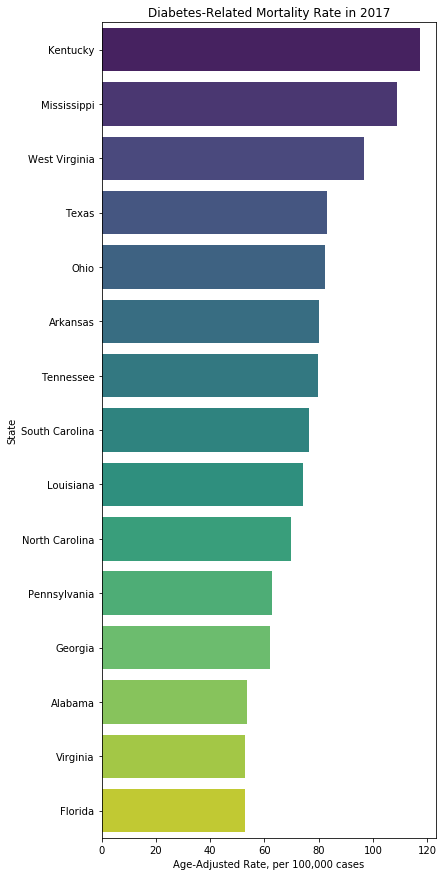

In [17]:
y = st_ovr.loc[(st_ovr.Year == 2017) & (st_ovr.LocationDesc.isin(diabetesbelt))].sort_values('DataValue',ascending=False).reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x='DataValue', y='LocationDesc', data = y, palette = 'viridis')
plt.title('Diabetes-Related Mortality Rate in 2017')
plt.xlabel('Age-Adjusted Rate, per 100,000 cases')
plt.ylabel('State')

Overall Prevalence of Diabetes

Text(0, 0.5, 'State')

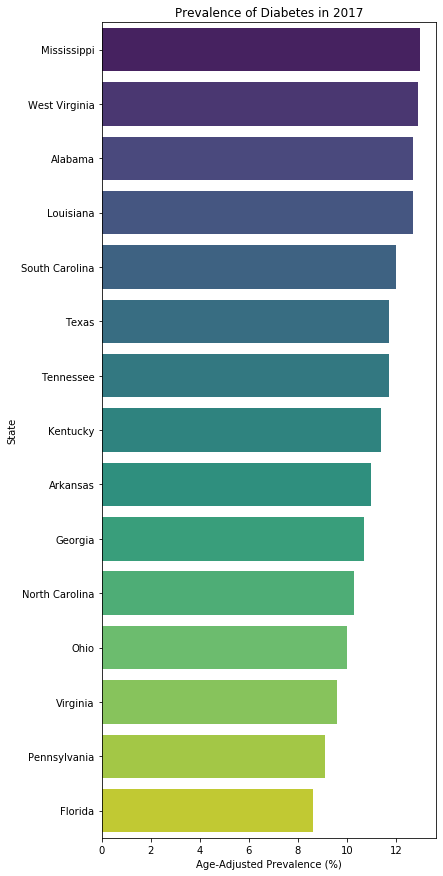

In [18]:
p_ovr = p_ovr.loc[(p_ovr.LocationDesc != 'Guam') & (p_ovr.LocationDesc != 'Puerto Rico') & (p_ovr.LocationDesc != 'Virgin Islands')]
y = p_ovr.loc[(p_ovr.Year == 2017)& (p_ovr.LocationDesc.isin(diabetesbelt))].sort_values('DataValue',ascending=False).reset_index()

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x='DataValue', y='LocationDesc', data = y, palette = 'viridis')
plt.title('Prevalence of Diabetes in 2017')
plt.xlabel('Age-Adjusted Prevalence (%)')
plt.ylabel('State')

Diabetes-related Mortality Rates from 2011 to 2018

Text(0, 0.5, 'State')

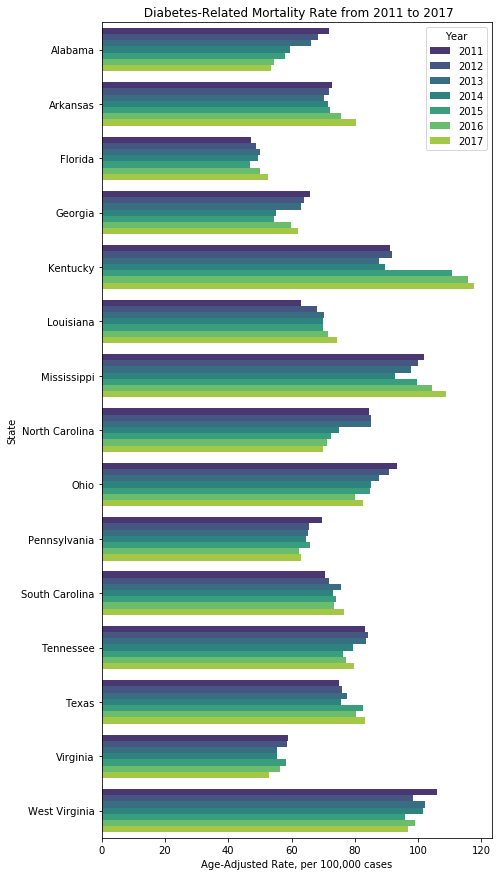

In [19]:
years = [2011,2012,2013,2014,2015,2016,2017]
st_ovr = st_ovr.sort_values('LocationDesc', ascending = True).reset_index()
st_over_highest = st_ovr.loc[(st_ovr.Year.isin(years)) & (st_ovr.LocationDesc.isin(diabetesbelt))]

f, ax = plt.subplots(figsize=(7, 15))
sns.barplot(x='DataValue', y='LocationDesc', hue = 'Year', data = st_over_highest, palette = 'viridis')
plt.title(' Diabetes-Related Mortality Rate from 2011 to 2017')
plt.xlabel('Age-Adjusted Rate, per 100,000 cases')
plt.ylabel('State')


Now, let's look at the data for **prevalence of diagnosed diabetes among adults** in these states

Prevalence of Diabetes from 2011 to 2017

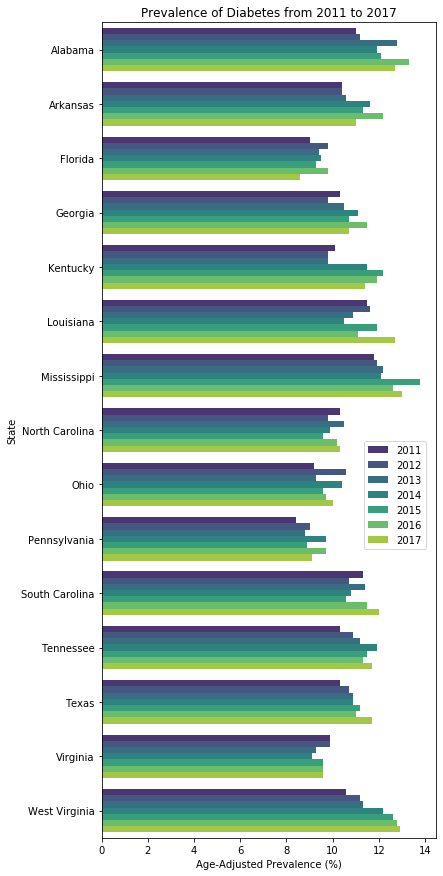

In [20]:
years = [2011,2011,2012,2013,2014,2015,2016,2017]
p_ovr = p_ovr.sort_values('LocationDesc', ascending = True).reset_index()
p_over_highest = p_ovr.loc[(p_ovr.Year.isin(years)) & (p_ovr.LocationDesc.isin(diabetesbelt))]

f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x='DataValue', y='LocationDesc', hue = 'Year', data = p_over_highest, palette = 'viridis')
plt.title('Prevalence of Diabetes from 2011 to 2017')
plt.xlabel('Age-Adjusted Prevalence (%)')
plt.ylabel('State')
ax.legend(loc='center left', bbox_to_anchor=(.77, .42), ncol=1)

Diabetes-Related Mortality Rate by Ethnicity

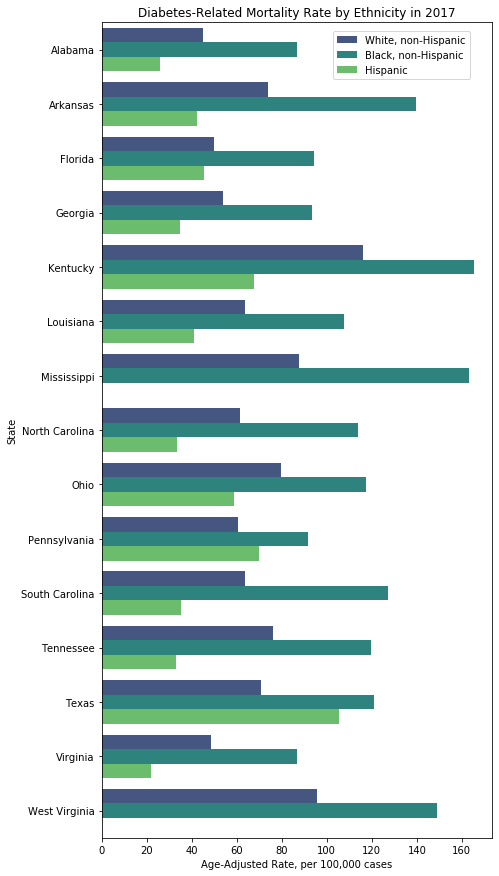

In [21]:
ethnicity = ['White, non-Hispanic','Black, non-Hispanic','Hispanic']
st_re_highest = st_re.sort_values('LocationDesc', ascending = True).reset_index()
st_re_highest = st_re_highest.loc[(st_re_highest.Year == 2017) & (st_re_highest.LocationDesc.isin(diabetesbelt)) & (st_re_highest.Stratification1.isin(ethnicity))]

f, ax = plt.subplots(figsize=(7, 15))
sns.barplot(x='DataValue', y='LocationDesc', hue = 'Stratification1', data = st_re_highest, palette = 'viridis')
plt.title('Diabetes-Related Mortality Rate by Ethnicity in 2017')
plt.xlabel('Age-Adjusted Rate, per 100,000 cases')
plt.ylabel('State')
ax.legend(loc='center left', bbox_to_anchor=(.58, .96), ncol=1)

Prevalence of Diabetes by Ethnicity

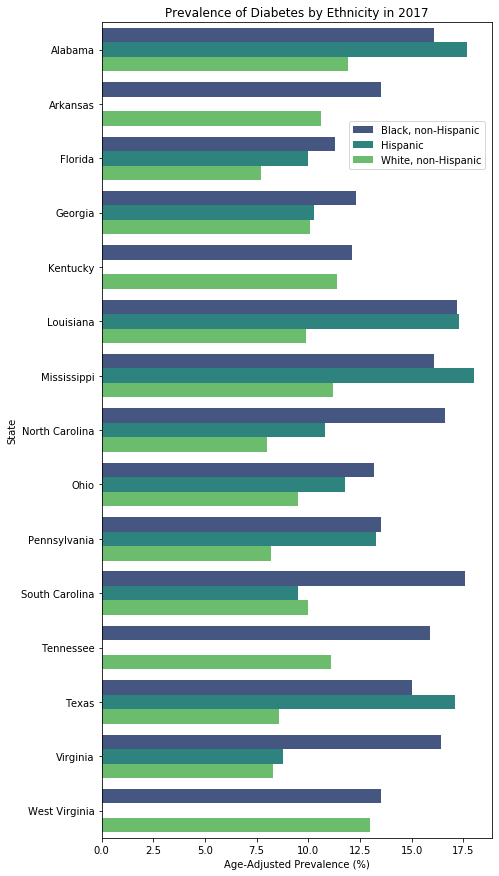

In [22]:
ethnicity = ['White, non-Hispanic','Black, non-Hispanic','Hispanic']
p_re_highest = p_re.sort_values('LocationDesc', ascending = True).reset_index()
p_re_highest = p_re_highest.loc[(p_re_highest.Year == 2017) & (p_re_highest.LocationDesc.isin(diabetesbelt)) & (p_re_highest.Stratification1.isin(ethnicity))]

f, ax = plt.subplots(figsize=(7, 15))
sns.barplot(x='DataValue', y='LocationDesc', hue = 'Stratification1', data = p_re_highest, palette = 'viridis')
plt.title('Prevalence of Diabetes by Ethnicity in 2017')
plt.xlabel('Age-Adjusted Prevalence (%)')
plt.ylabel('State')
ax.legend(loc='center left', bbox_to_anchor=(.62, .85), ncol=1)

Diabetes-Related Mortality Rate by Gender

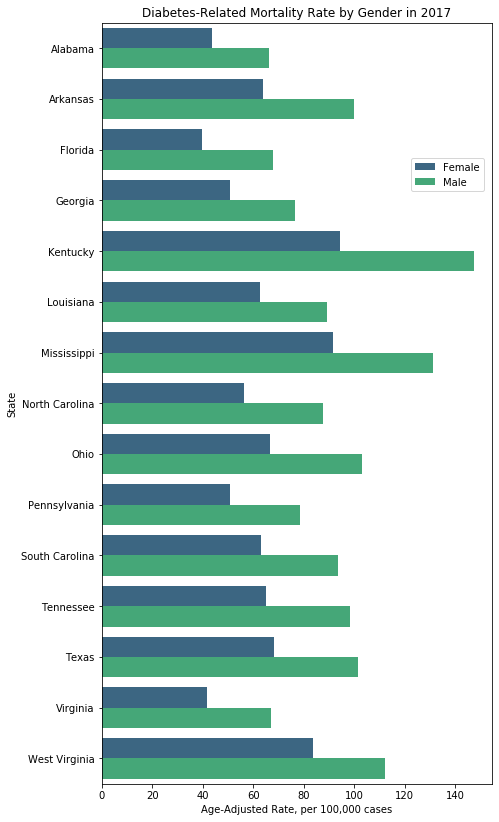

In [23]:
st_g_highest = st_g.sort_values('LocationDesc', ascending = True).reset_index()
st_g_highest = st_g_highest.loc[(st_g_highest.Year == 2017) & (st_g_highest.LocationDesc.isin(diabetesbelt))]

f, ax = plt.subplots(figsize=(7, 14))
sns.barplot(x='DataValue', y='LocationDesc', hue = 'Stratification1', data = st_g_highest, palette = 'viridis')
plt.title('Diabetes-Related Mortality Rate by Gender in 2017')
plt.xlabel('Age-Adjusted Rate, per 100,000 cases')
plt.ylabel('State')
ax.legend(loc='center left', bbox_to_anchor=(.78, .8), ncol=1)

Prevalence of Diabetes by Gender

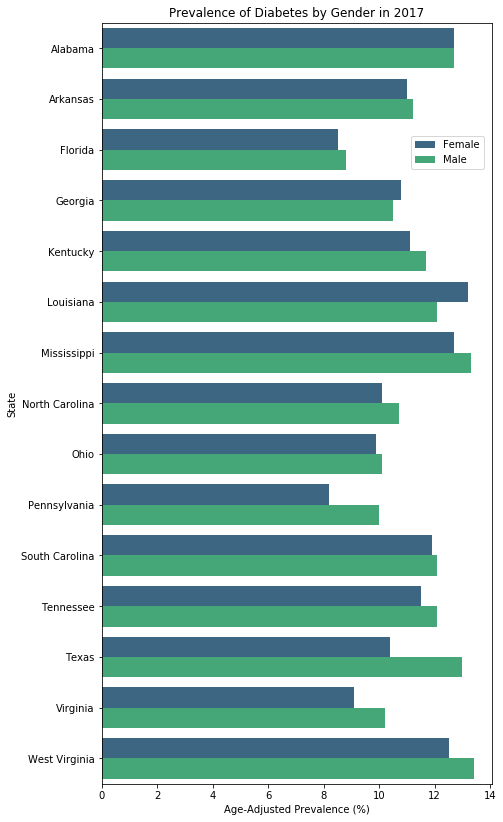

In [24]:
p_gen_highest = p_gen.sort_values('LocationDesc', ascending = True).reset_index()
p_gen_highest = p_gen_highest.loc[(p_gen_highest.Year == 2017) & (p_gen_highest.LocationDesc.isin(diabetesbelt))]

f, ax = plt.subplots(figsize=(7, 14))
sns.barplot(x='DataValue', y='LocationDesc', hue = 'Stratification1', data = p_gen_highest, palette = 'viridis')
plt.title('Prevalence of Diabetes by Gender in 2017')
plt.xlabel('Age-Adjusted Prevalence (%)')
plt.ylabel('State')
ax.legend(loc='center left', bbox_to_anchor=(.78, .83), ncol=1)

**Statistical Tests:**

***Independent T-Test*** to compare the means of diabetes prevalence and diabetes-related mortality for male and female adults.

Assumptions:
1. Independence
2. Normality of Dependent Variable
3. Homogeneity of Variances

Independent T-Test Null Hypothesis: Population Means are equal

Independent T-Test Alternative Hypothesis: Population Means are NOT equal

Diabetes-Related Mortality Rates in 2017: 

Normality: 
p=0.174 > 0.05
Assumption Met
Fail to reject the null hypothesis. (Sample is a Normal Distribution)

Homogeneity of Variances using Levene's Test: 
p=0.311 > 0.05
Assumption Met
Fail to reject the null hypothesis. (Variances are equal for all samples)

Independent T-Test: 
p=0.000 < 0.05
Reject the null hypothesis. (Population means are NOT equal)

Mean of Diabetes Mortality Rate for Females: 62.92666666666666
Mean of Diabetes Mortality Rate for Males: 94.68
Standard Deviation of Diabetes Mortality Rate for Females: 16.318597434284058
Standard Deviation of Diabetes Mortality Rate for Males: 22.411134137596278


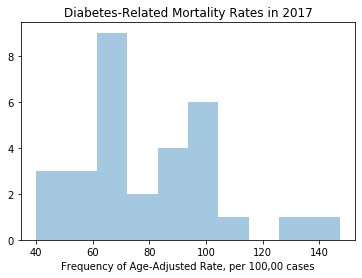

In [25]:
p_norm = st_g.loc[(st_g.Year == 2017) & (st_g.LocationDesc.isin(diabetesbelt))]; check_norm = p_norm.DataValue.values
p_norm_m = p_norm.loc[(p_norm.Stratification1 == 'Male')] ; p_norm_f = p_norm.loc[(p_norm.Stratification1 == 'Female')]
check_norm_m = p_norm_m.DataValue.values; check_norm_f = p_norm_f.DataValue.values

plt.title('Diabetes-Related Mortality Rates in 2017')
sns.distplot(p_norm.DataValue, kde=False, bins=10)
plt.xlabel('Frequency of Age-Adjusted Rate, per 100,00 cases')

print("Diabetes-Related Mortality Rates in 2017: "); print('')
alpha = 0.05

stat1, p1 = stats.normaltest(check_norm)
print("Normality: ")
if p1 > alpha:  
    print('p=%.3f' % (p1) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Sample is a Normal Distribution)")
else:
    print('p=%.3f' % (p1) + " < " + str(alpha)); print("Reject the null hypothesis.(Sample is NOT a Normal Distribution)")

print('')

stat, p = levene(check_norm_m,check_norm_f)
print("Homogeneity of Variances using Levene's Test: ")
if p > alpha:  # null hypothesis: Variances are equal
    print('p=%.3f' % (p) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Variances are equal for all samples)")
else:
    print('p=%.3f' % (p) + " < " + str(alpha)); print("Reject the null hypothesis. (Variances are NOT equal for all samples)")
    
print('')
    
tstat, pt = stats.ttest_ind(check_norm_m,check_norm_f)
print("Independent T-Test: ")
if pt > alpha: 
    print('p=%.3f' % (pt) + " > " + str(alpha))
    print("Fail to reject the null hypothesis. (Population means are equal)")
else:
    print('p=%.3f' % (pt) + " < " + str(alpha)); print("Reject the null hypothesis. (Population means are NOT equal)")

print('')
print("Mean of Diabetes Mortality Rate for Females: " + str(np.mean(check_norm_f)))
print("Mean of Diabetes Mortality Rate for Males: " + str(np.mean(check_norm_m)))
print("Standard Deviation of Diabetes Mortality Rate for Females: " + str(np.std(check_norm_f)))
print("Standard Deviation of Diabetes Mortality Rate for Males: " + str(np.std(check_norm_m)))

Diabetes Prevalence in 2017: 

Normality: 
p=0.419 > 0.05
Assumption Met
Fail to reject the null hypothesis. (Sample is a Normal Distribution)

Homogeneity of Variances using Levene's Test: 
p=0.757 > 0.05
Assumption Met
Fail to reject the null hypothesis. (Variances are equal for all samples)

Independent T-Test: 
p=0.311 > 0.05
Fail to reject the null hypothesis. (Population means are equal)

Mean of Diabetes Prevalence for Females: 10.906666666666666
Mean of Diabetes Prevalence for Males: 11.459999999999999
Standard Deviation of Diabetes Prevalence for Females: 1.503979905303111
Standard Deviation of Diabetes Prevalence for Males: 1.3305637902783918


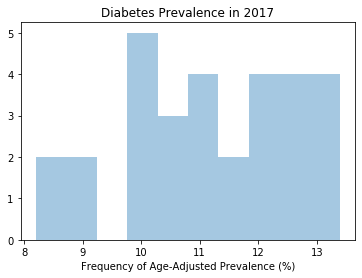

In [26]:
p_norm = p_gen.loc[(p_gen.Year == 2017) & (p_gen.LocationDesc.isin(diabetesbelt))]; check_norm = p_norm.DataValue.values
p_norm_m = p_norm.loc[(p_norm.Stratification1 == 'Male')] ; p_norm_f = p_norm.loc[(p_norm.Stratification1 == 'Female')]
check_norm_m = p_norm_m.DataValue.values; check_norm_f = p_norm_f.DataValue.values

plt.title('Diabetes Prevalence in 2017')
sns.distplot(p_norm.DataValue, kde=False, bins=10)
plt.xlabel('Frequency of Age-Adjusted Prevalence (%)')

print("Diabetes Prevalence in 2017: "); print('')
alpha = 0.05

stat1, p1 = stats.normaltest(check_norm)
print("Normality: ")
if p1 > alpha:
    print('p=%.3f' % (p1) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Sample is a Normal Distribution)")
else:
    print('p=%.3f' % (p1) + " < " + str(alpha)); print("Reject the null hypothesis.(Sample is NOT a Normal Distribution)")

print('')

stat, p = levene(check_norm_m,check_norm_f)
print("Homogeneity of Variances using Levene's Test: ")
if p > alpha:  # null hypothesis: Variances are equal
    print('p=%.3f' % (p) + " > " + str(alpha)); print('Assumption Met')
    print("Fail to reject the null hypothesis. (Variances are equal for all samples)")
else:
    print('p=%.3f' % (p) + " < " + str(alpha)); print("Reject the null hypothesis. (Variances are NOT equal for all samples)")
    
print('')
    
tstat, pt = stats.ttest_ind(check_norm_m,check_norm_f)
print("Independent T-Test: ")
if pt > alpha: 
    print('p=%.3f' % (pt) + " > " + str(alpha))
    print("Fail to reject the null hypothesis. (Population means are equal)")
else:
    print('p=%.3f' % (pt) + " < " + str(alpha)); print("Reject the null hypothesis. (Population means are NOT equal)")
    
print('')
print("Mean of Diabetes Prevalence for Females: " + str(np.mean(check_norm_f)))
print("Mean of Diabetes Prevalence for Males: " + str(np.mean(check_norm_m)))
print("Standard Deviation of Diabetes Prevalence for Females: " + str(np.std(check_norm_f)))
print("Standard Deviation of Diabetes Prevalence for Males: " + str(np.std(check_norm_m)))